In [1]:
import os
import sys

from cv2 import cv2
import numpy as np
from scipy import ndimage

import matplotlib.pyplot as plt

# Loading image and contours

In [2]:
# For ease, there are two images we can mask to get get accurate image
# We can change this later to actually compute the mask

img1 = cv2.imread("imgs/1.png", cv2.IMREAD_COLOR)
img3 = cv2.imread("imgs/3.png", cv2.IMREAD_COLOR)

mask = np.all(img1==img3, axis=2, keepdims=True).astype(np.uint8)

In [3]:
# Set the background to zero. Again, changeable later.
img = np.where(mask, img1, np.zeros_like(img1))

In [4]:
# Can modify arguments to this, but idk what the others mean
_, contours, heir = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Visualizing contours

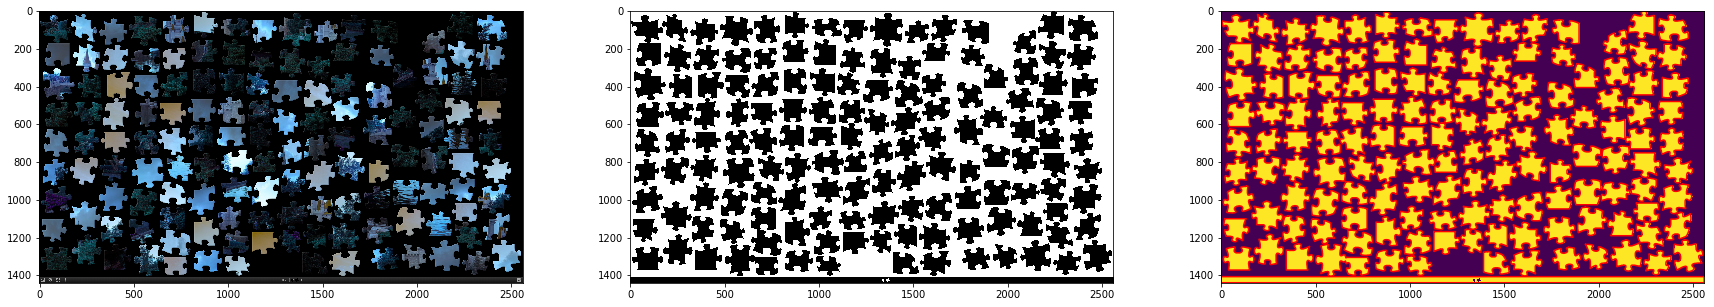

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(30, 5))

axs[0].imshow(img)
axs[1].imshow(mask[:,:,0], cmap='binary')


axs[2].imshow(mask[:,:,0])
# ax.plot(*np.squeeze(contours[1]).T, 'r-')
for cnt in contours:
    axs[2].plot(*np.squeeze(cnt).T, 'r-')

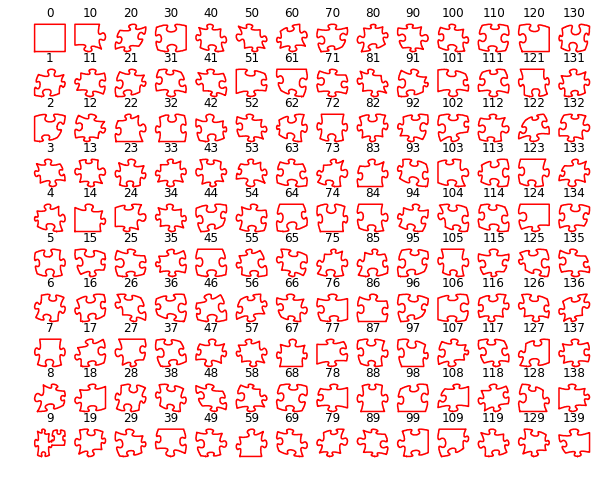

In [6]:
fig, axs = plt.subplots(10, 14, figsize=(10, 8))
plt.subplots_adjust(hspace=0.5)

for i in range(10):
    for j in range(14):
        
        idx = 10*j+i
        
        axs[i][j].axis('off')
        
        if idx >= len(contours):
            break
        
        # Contours start from random (x,y) location, so reset to (0,0)
        cnt = contours[idx] - contours[idx].min(0)
        
        axs[i][j].plot(*np.squeeze(cnt).T, 'r-')
        
        axs[i][j].set_title(f"{idx}")